<a href="https://colab.research.google.com/github/kaluznys/uczenie_maszynowe_UW/blob/main/praca_domowa_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework Assignment: Understanding Binary Cross-Entropy in the Forward Stagewise Procedure
-----------------------------

## The Problem

In this assignment, you will demonstrate that adding a new constant predictor in the forward stagewise procedure to an already existing predictor from a previous stage, $f_{m-1}(x_i)$ (which we will denote as $f_i$ for ease of notation), may be for certain loss functions fundamentally more challenging than building a constant predictor from scratch. You will work with the binary cross-entropy loss defined as

$$
L(y, z) = -y \log(\sigma(z)) - (1 - y) \log(1 - \sigma(z)),
$$

where

- $y_i \in \{0,1\}$ are the binary labels,
- $\sigma(z) = \frac{1}{1 + e^{-z}}$ is the sigmoid function.

For the purposes of this assignment, assume that you are given:

- A dataset of binary labels $y_i$.
- **Two constants: $m$ (the number of ones) and $k$ (the number of zeros)** in the labels in the dataset.
- A set of predictions $f_i = f_{m-1}(x_i)$ obtained from a previous stage, where the $f_i$ values are generated randomly from a normal distribution.

### The assignment will explore two scenarios:

### Scenario A: Fitting a Constant Predictor from Scratch

In this scenario, you are building a predictor from scratch. The task is to find the optimal constant value $\lambda$ that minimizes the binary cross-entropy loss over the dataset. Formulate the optimization problem as:

$$
\lambda^* = \arg\min_{\lambda} \sum_{i=1}^{n} L(y_i, \lambda).
$$



### Scenario B: Fitting the m-th Predictor in the Forward Stagewise Procedure

Now assume you already have an existing predictor $f_i = f_{m-1}(x_i)$. Rather than predicting from scratch, you wish to find an optimal additive correction $\lambda$ such that the updated prediction for each data point becomes

$$
 f_i + \lambda,
$$

and the corresponding binary cross-entropy loss is given by

$$
\lambda^* = \arg\min_{\lambda} \sum_{i=1}^{n} L(y_i, f_i + \lambda).
$$


## Research Questions

In this assignment you will answer the following questions:

- Why is finding an optimal additive shift $\lambda$ in the forward stagewise procedure fundamentally harder than directly fitting a single-parameter predictor from scratch?
- How does the complexity of the loss landscape differ between these two scenarios? Discuss the differences in the shape and smoothness of the loss function in both cases.

## Tasks & Deliverables

1. **Derivation and Analysis**

  **Scenario A:**
  - Derive explicitly the optimal $\lambda$ for fitting from scratch, i.e., solve
    
    $$
    \lambda^* = \arg\min_{\lambda} \sum_{i=1}^{n} L(y_i, \lambda)
    $$
    
    and express the answer in terms of $m$ and $k$.
    *Hint:* First, write the derivative of the loss with respect to $\lambda$ and set it to zero to obtain an implicit equation.

  - **Interpretation:**
  Provide a clear interpretation of your derived optimal $\lambda$. What does this constant represent in terms of the dataset's label distribution?

  **Scenario B:**
  - Derive the implicit equation that $\lambda$ must satisfy in the additive shift scenario:
    
    $$
    \lambda^* = \arg\min_{\lambda} \sum_{i=1}^{n} L(y_i, f_i + \lambda).
    $$
    *Hint:* First, write the derivative of the loss with respect to $\lambda$ and set it to zero to obtain an implicit equation.

  - **Discussion:**
    Explain clearly why this implicit equation has no simple closed-form solution, unlike the previous case. What role does the non-linearity of the sigmoid function (in the binary cross-entropy loss) play in this difficulty?

2. **Loss Landscape Exploration (Python)**

  Write a Python code that:

  - Uses provided values for $n$, and for $k$ and $m$ (the number of zeros and ones in the labels, respectively), $k+m=n$.
  - Generates a set of predictions $f_i$ by sampling from a normal distribution.
  - Plots the binary cross-entropy loss as a function of $\lambda$ for:
    - Scenario A:
      $$
      \text{plot } \sum_{i=1}^{n} L(y_i, \lambda) \text{ as a function of }\lambda
      $$
    - Scenario B:
      $$
      \text{plot } \sum_{i=1}^{n} L(y_i, f_i + \lambda) \text{ as a function of }\lambda
      $$
  - **Discussion:**
  Is the loss landscape in Scenario A simpler or more complex than in Scenario B? Is it multimodal or unimodal? If so, is it thinkable the lambda minimizer in Scenario B can be found numerically? Where does the difficulty in Scenario B come from: the non-linearity of the problem or a complex loss landscape?

3. **Report**  
   - Summarize your theoretical insights and empirical findings in a **Colab notebook**.
   - Include the relevant proofs, code, discussion, and conclusions.
   - Place the notebook in your **GitHub repository** for this course, add a link to it in your README.md and add an **“Open in Colab”** badge in the notebook so it can be launched directly.



Zauważmy najpierw, że będziemy minimalizować funkcję postaci:
$\sum_{i=1}^n L(y_i, \lambda) = -m \log(\sigma(\lambda)) - k \log(1 - \sigma(\lambda))$.
Przyda się nam obserwacja iż $ \frac{d}{d\lambda}\sigma(\lambda)= \sigma(\lambda)\cdot (1-\sigma(\lambda))$.

Oznaczmy dla uproszczenia $s = \sigma(\lambda)$, mamy ze standardowych wzorów i obserwacji:
$0 = \frac{d}{d\lambda} \left( -m \log(s) - k \log(1 - s) \right)
= -m \cdot \frac{1}{s} \cdot s' + (-k) \cdot \frac{1}{1 - s} \cdot -s'=-m  \cdot (1-s) + k \cdot s $. Zatem:
$(m+k)\cdot s = m$ i kolejno:

$\frac{1}{s} = \frac{m+k}{m}$,

$ e^{-\lambda}= \frac{n-m}{m} $,

$\lambda = -\log(\frac{k}{m})= \log(\frac{m}{k})$,





Niech $s_i = f_i+λ$. Tym razem minimalizujemy: $\sum_{i=1}^n L(y_i, s_i) =\sum_{i=1}^n -y_i \log(\sigma(s_i)) - (1 - y_i) \log(1 - \sigma(s_i))$. Nadal zachodzi obserwacja z wcześniej gdyż $f_i$ to stały predyktor. Skoro $\frac{d}{d\lambda} L(y_i, f_i + \lambda)= -y_i\cdot (1-σ(s_i))+(1-y_i)σ(s_i)= -y_i+σ(s_i)$, zatem:
$\sum_{i=1}^n \frac{d}{d\lambda} L(y_i, f_i + \lambda) = \sum_{i=1}^n \left[ \sigma(f_i + \lambda) - y_i \right]$. Skąd dostaniemy warunek na minimum lokalne $\sum_{i=1}^n σ(s_i) = \sum_{i=1}^n y_i$
Tej postaci nie da się już uprościć ze względu na nieliniowość funkcji sigmoid.

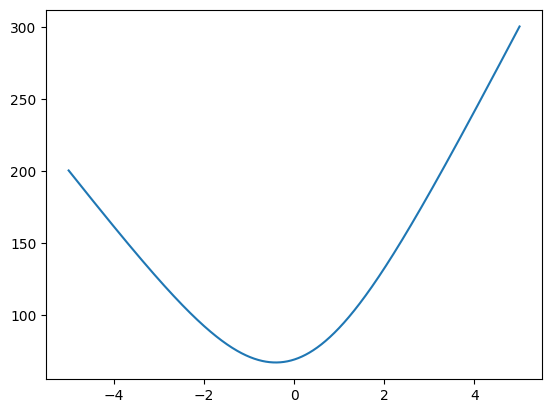

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
m=40
k=60
n=m+k
y= [1]*40+[0]*60
preds=np.random.normal(size=100)
lambdas = np.linspace(-5, 5, 1000)
loss_a= -m*np.log(1/(1+np.exp(-lambdas)))-k*np.log(1-1/(1+np.exp(-lambdas)))
plt.plot(lambdas, loss_a)
plt.show()

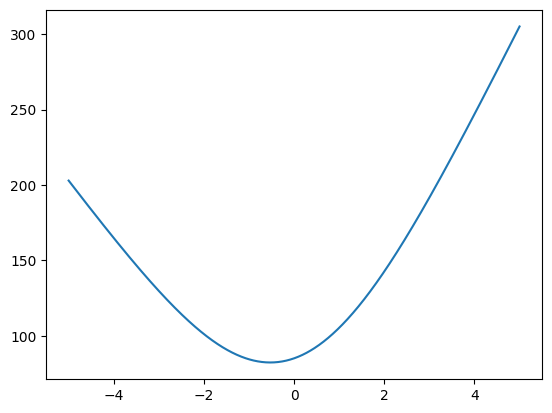

In [ ]:

losses_b= [0]* len(lambdas)
for j in range(len(lambdas)):
    loss_b_term= [-y[i]*np.log(1/(1+np.exp(-lambdas[j]-preds[i])))-(1-y[i])*np.log(1-1/(1+np.exp(-lambdas[j]-preds[i]))) for i in range(len(preds))]
    losses_b[j] = sum(loss_b_term)
plt.plot(lambdas, losses_b)
plt.show()

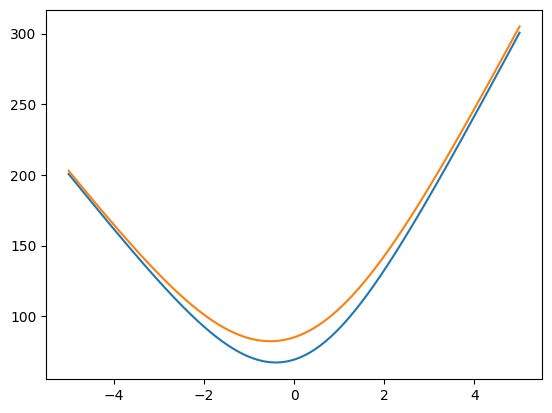

In [10]:
plt.plot(lambdas, loss_a)
plt.plot(lambdas, losses_b)
plt.show()